In [98]:
import numpy as np
import pandas as pd
from datetime import date
# imports for database
import psycopg2 as pg
from db_connection import connect
from timebasedcv import TimeBasedCV
from sklearn.preprocessing import StandardScaler
import model_functions
from datetime import datetime


# models
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier
import pickle 

In [2]:
# read data from db
sql = 'SELECT * FROM processed_bitcoin'
df = pd.read_sql_query(sql=sql,con=connect())

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 13.2 on x86_64-apple-darwin, compiled by Apple clang version 11.0.3 (clang-1103.0.32.59), 64-bit',)
Connection successful


In [3]:
# quantify buy and sell to check for imbalance
class_name ={0:'sell',1:'buy'}
df['signal'].value_counts().rename(index=class_name)/len(df)

buy     0.566541
sell    0.433459
Name: signal, dtype: float64

In [4]:
# split train and test set 
SPLIT_DATE = date(2022,3,1)

In [101]:
df.loc[df.prediction_date < datetime.strptime(time, "%Y-%m-%d")]

TypeError: can't compare datetime.datetime to datetime.date

In [5]:
# split train and test data
train_data = df.loc[df.prediction_date < SPLIT_DATE]
test_data = df.loc[df.prediction_date >= SPLIT_DATE]

In [9]:
# create timebasedCV object
tscv = TimeBasedCV(train_period=30,
                   test_period=7,
                   freq='days')

In [10]:
index_output = tscv.split(train_data,date_column='prediction_date')

In [11]:
index_output

[([0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29],
  [30, 31, 32, 33, 34, 35, 36]),
 ([7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36],
  [37, 38, 39, 40, 41, 42, 43]),
 ([14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43],
  [44, 45, 46, 47, 48, 49, 50]),
 ([21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50],
  [51, 52, 53, 54, 55, 56, 57]),
 ([28,
   29,
   30,
   31,
   32,
  

## Creating train Test Split Using Time basedCV

In [13]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()
for train_index, test_index in index_output:
    X_train= X_train.append(train_data.loc[train_index].drop('prediction_date', axis=1))
    X_test= X_test.append(train_data.loc[test_index].drop('prediction_date', axis=1))

In [16]:
# create drop y_train
y_train = X_train["signal"]
X_train.drop("signal",inplace=True,axis=1)

In [17]:
# create y_test 
y_test = X_test["signal"]
X_test.drop("signal",inplace=True,axis=1)

## Scale the data

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train.mean()

-1.3751469681165567e-18

ValueError: can only convert an array of size 1 to a Python scalar

## Model Building

In [27]:
# models we will be testing out [(name,model)]
models = [('LR',LogisticRegression(max_iter=300)),
          ('KNN',KNeighborsClassifier()),
          ('SVC',SVC()),
          ('XGB',XGBClassifier()),
          ('DTC',DecisionTreeClassifier()),
          ('ADA',AdaBoostClassifier()),
          ('RF', RandomForestClassifier()),
          ('ET',ExtraTreesClassifier())]

100%|█████████████████████████████████████████████| 8/8 [01:58<00:00, 14.83s/it]


[]

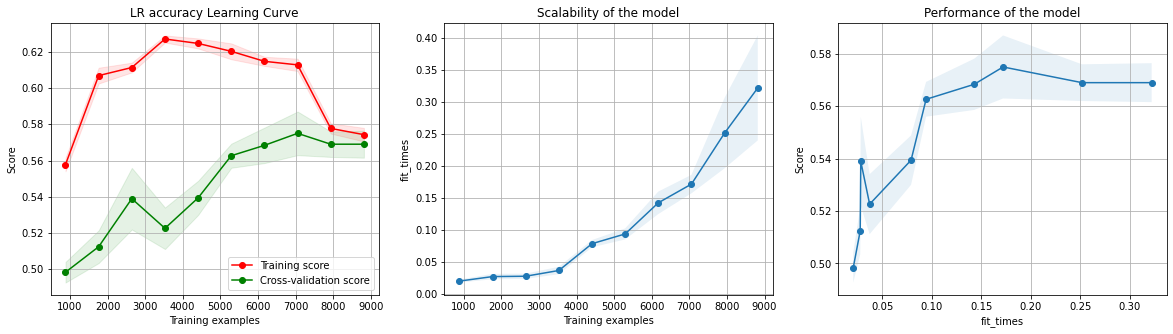

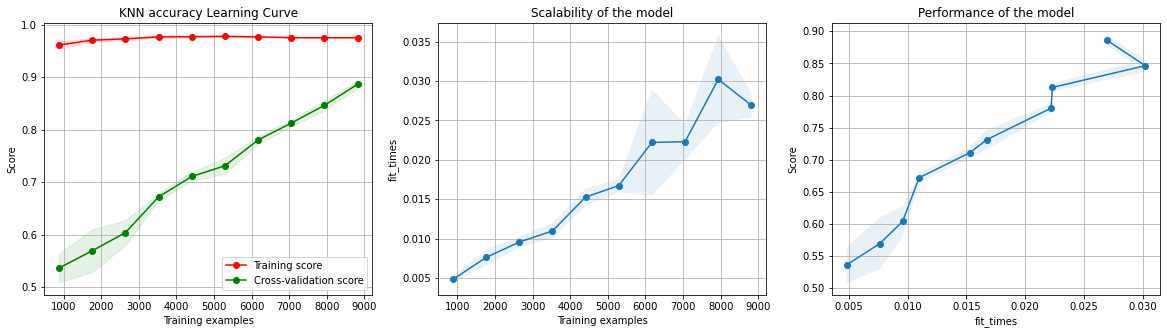

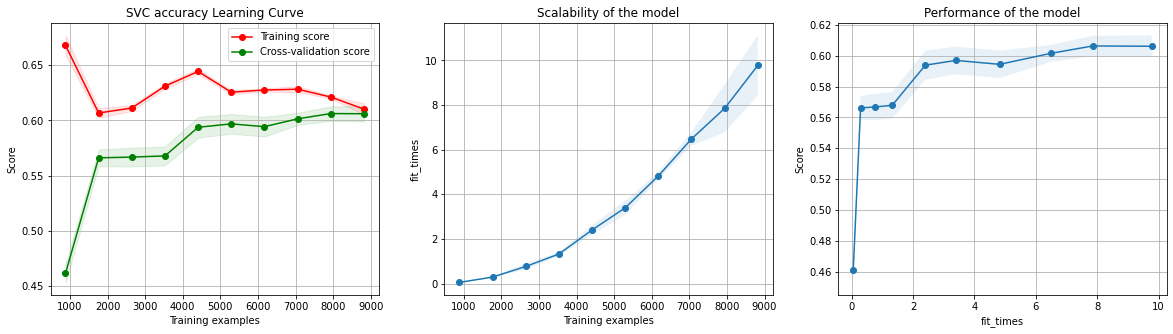

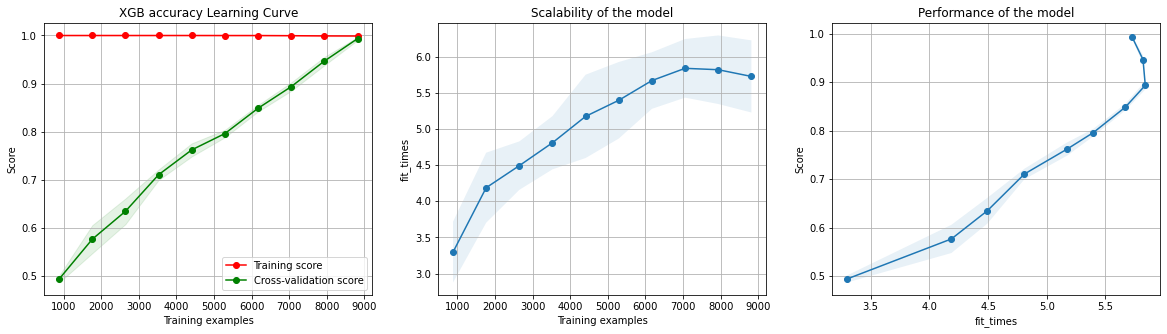

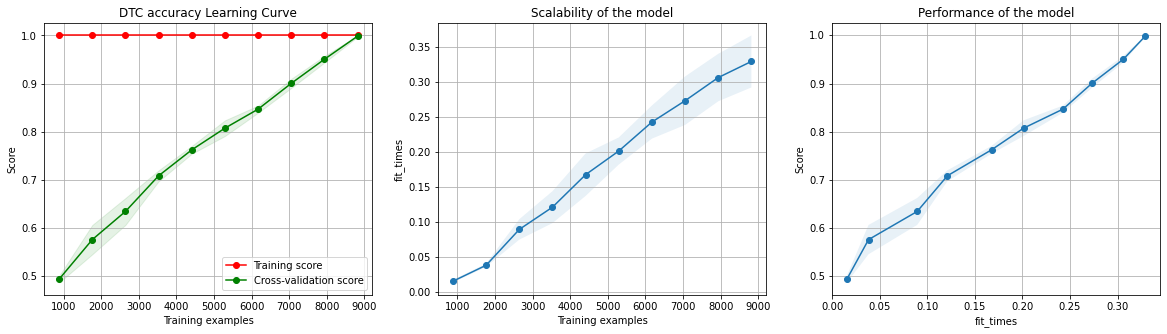

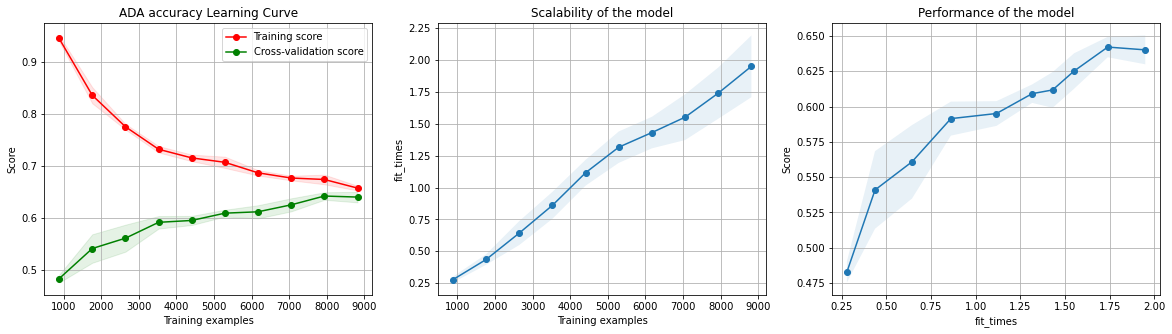

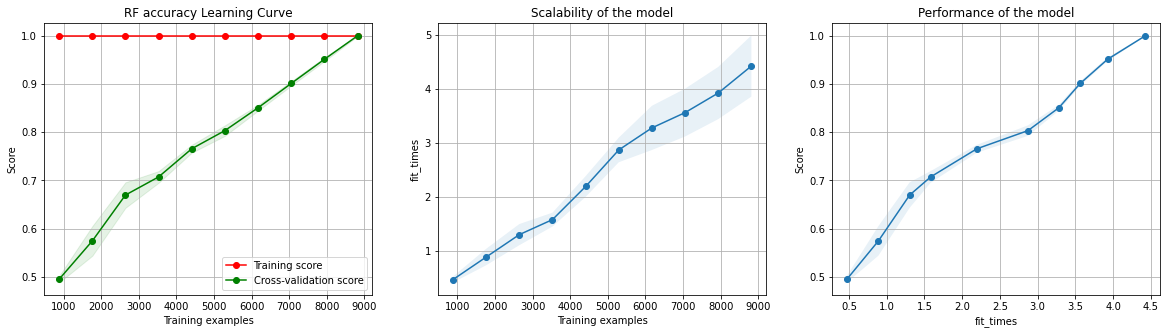

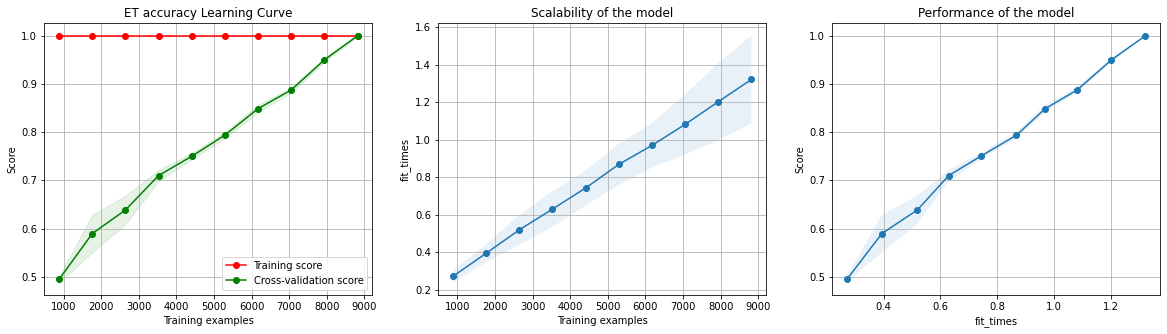

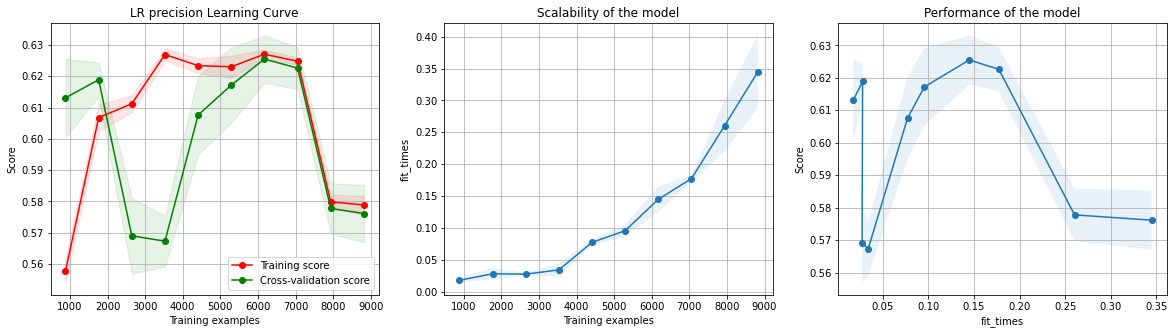

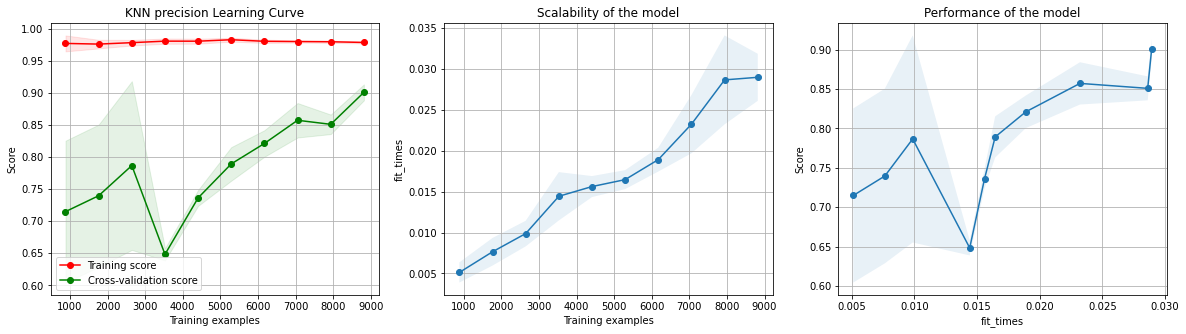

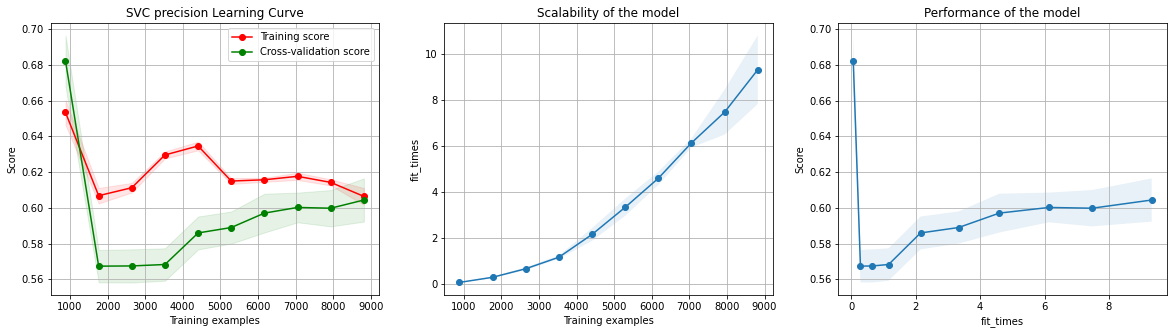

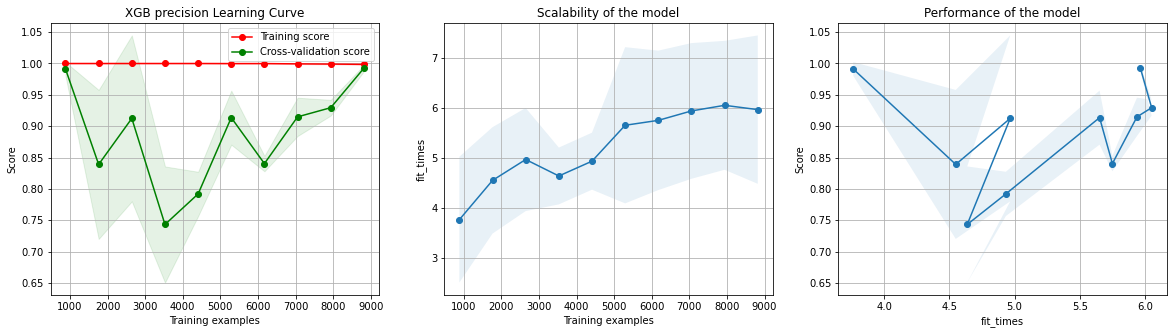

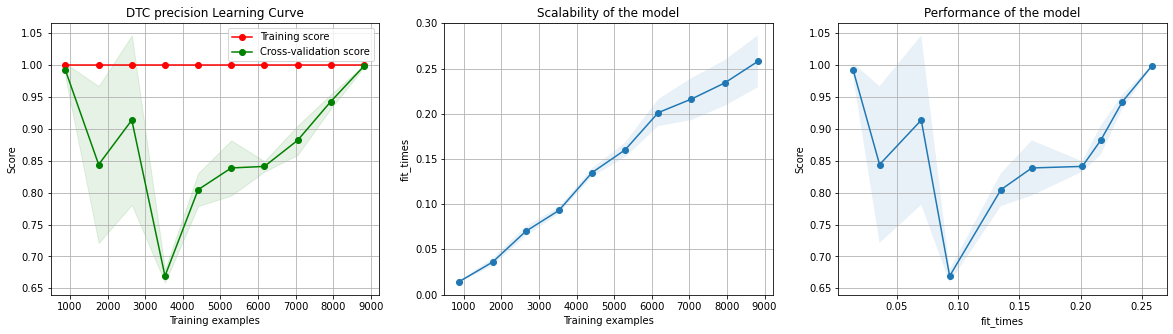

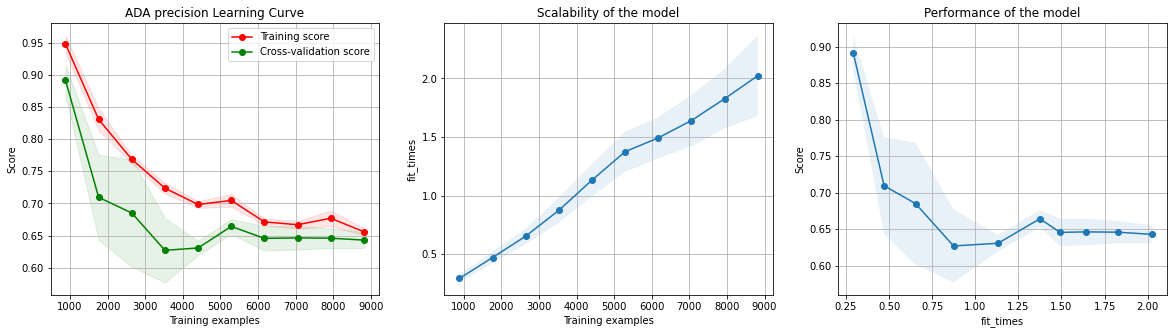

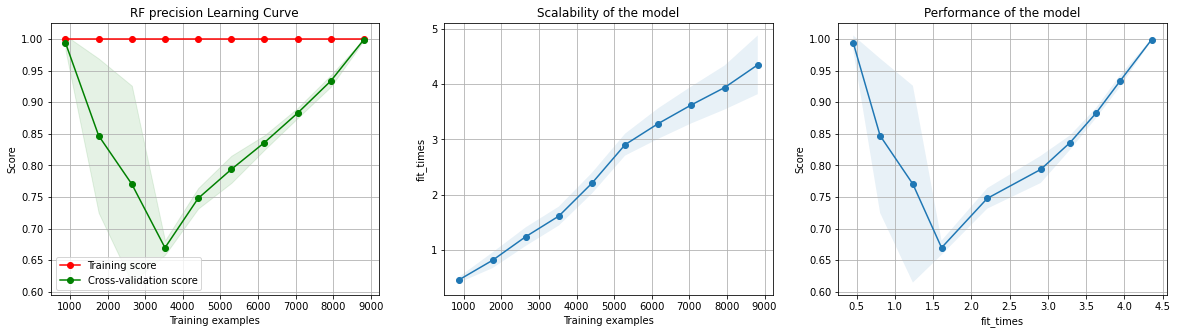

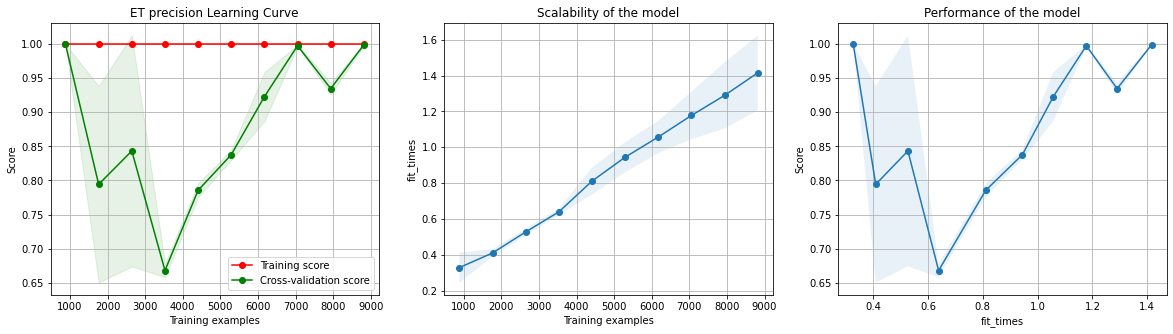

[22:02:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

/Users/faithful/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/faithful/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/faithful/anaconda3/envs/venv/lib/python3.8/

ARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'bi

/Users/faithful/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/faithful/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:02:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

/Users/faithful/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/faithful/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/faithful/anaconda3/envs/venv/lib/python3.8/

[22:02:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

/Users/faithful/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/faithful/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [30]:
# evaluate model learning curves
model_functions.eval_learning_curves(models=models,x=X_train,
                                     y=y_train,scoring=['accuracy','precision'])

In [31]:
new_models = [('KNN',KNeighborsClassifier()),
          ('XGB',XGBClassifier()),
          ('RF', RandomForestClassifier()),
          ('ET',ExtraTreesClassifier())]

 25%|███████████▎                                 | 1/4 [00:00<00:01,  2.11it/s]/Users/faithful/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:52:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|█████████████████████████████████████████████| 4/4 [00:06<00:00,  1.57s/it]


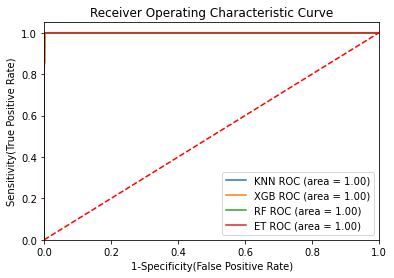

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,KNN,0.997283,0.996390,0.996826,0.996890
1,XGB,0.998298,0.997744,0.998017,0.998056
2,RF,0.999318,0.999097,0.999207,0.999222
3,ET,0.999659,0.999549,0.999604,0.999611


In [32]:
# evaluate model performance report and roc curves
model_functions.eval_model_performance(models=new_models,x_train=X_train,
                                       y_train=y_train,x_test=X_test,y_test=y_test)

## KNN Hyperparameter Tuning

In [50]:
# Method of selecting samples for training each tree
knn_neighbors = [int(x) for x in np.linspace(3, 11, num = 9)]
# Create the random grid
knn_grid = {'n_neighbors': knn_neighbors
            }
# use GridsearchCV, set scoring parameters and # of CV 
knn_scoring = 'precision'
knn_kfold = KFold(n_splits=5,random_state=42,shuffle=True)

gs_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid=knn_grid,cv=knn_kfold,n_jobs=-1,
                     verbose=1,scoring=knn_scoring)
gs_knn.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='precision', verbose=1)

In [51]:
gs_knn.cv_results_

{'mean_fit_time': array([0.02919798, 0.02833333, 0.02981858, 0.02868447, 0.03162537,
        0.02754302, 0.02533975, 0.02911611, 0.03084865]),
 'std_fit_time': array([0.00137712, 0.00272683, 0.00393695, 0.00461403, 0.00341126,
        0.00245458, 0.00283196, 0.00153101, 0.00263436]),
 'mean_score_time': array([0.20577803, 0.23449092, 0.23396025, 0.28621244, 0.29218926,
        0.25950413, 0.25884967, 0.28257499, 0.19930472]),
 'std_score_time': array([0.00085365, 0.01214979, 0.00211532, 0.02019429, 0.02497283,
        0.00920977, 0.0107124 , 0.00398227, 0.01457171]),
 'param_n_neighbors': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10, 11],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors': 9},
  {'n_neighbors': 10},
  {'n_neighb

In [52]:
gs_knn.best_params_

{'n_neighbors': 3}

In [53]:
final_knn = KNeighborsClassifier(n_neighbors=3)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.5s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.3s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.5s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.7s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.9s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.2s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.6s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.9s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.2s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
/Users/faithful/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.6s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.2s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.2s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.2s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.4s finished


<module 'matplotlib.pyplot' from '/Users/faithful/anaconda3/envs/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

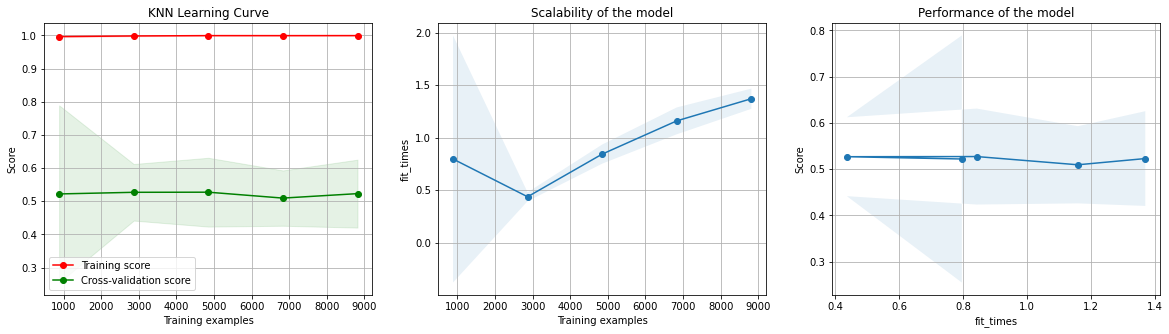

In [54]:
model_functions.plot_learning_curve(estimator=gs_knn,title='KNN Learning Curve',
                                   score='precision',X=X_train,y=y_train)

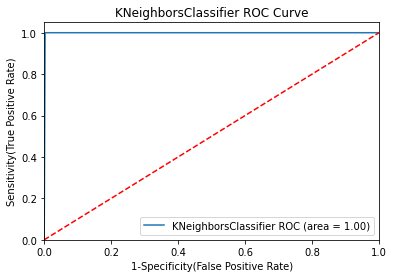

1

In [55]:
model_functions.plot_roc_curve(estimator=final_knn,x_train=X_train,
                               y_train=y_train,x_test=X_test,y_test=y_test)

## training final model on the training dataset

In [56]:
train_data

,prediction_date,open_price_1,open_price_2,open_price_3,open_price_4,open_price_5,open_price_6,high_1,high_2,high_3,...,close_price_4,close_price_5,close_price_6,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6,signal
0,2015-01-06,310.91,320.43,314.08,314.85,281.15,265.08,320.19,320.43,315.84,...,281.08,264.20,274.47,13942900,8036550,7860650,33054400,55629100,43962800,0
1,2015-01-07,320.43,314.08,314.85,281.15,265.08,274.61,320.43,315.84,315.15,...,264.20,274.47,286.19,8036550,7860650,33054400,55629100,43962800,23245700,0
2,2015-01-08,314.08,314.85,281.15,265.08,274.61,286.08,315.84,315.15,287.23,...,274.47,286.19,294.34,7860650,33054400,55629100,43962800,23245700,24866800,0
3,2015-01-09,314.85,281.15,265.08,274.61,286.08,294.14,315.15,287.23,278.34,...,286.19,294.34,283.35,33054400,55629100,43962800,23245700,24866800,19982500,0
4,2015-01-10,281.15,265.08,274.61,286.08,294.14,282.38,287.23,278.34,287.55,...,294.34,283.35,290.41,55629100,43962800,23245700,24866800,19982500,18718600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,2022-02-24,40552.13,40026.02,40118.10,38423.21,37068.77,38285.28,40929.15,40418.88,40119.89,...,37075.28,38286.03,37296.57,23310007704,13736557863,18340576452,29280402798,25493150450,21849073843,1
2603,2022-02-25,40026.02,40118.10,38423.21,37068.77,38285.28,37278.57,40418.88,40119.89,39394.44,...,38286.03,37296.57,38332.61,13736557863,18340576452,29280402798,25493150450,21849073843,46383802093,0
2604,2022-02-26,40118.10,38423.21,37068.77,38285.28,37278.57,38333.75,40119.89,39394.44,38359.86,...,37296.57,38332.61,39214.22,18340576452,29280402798,25493150450,21849073843,46383802093,26545599159,1
2605,2022-02-27,38423.21,37068.77,38285.28,37278.57,38333.75,39213.08,39394.44,38359.86,39122.39,...,38332.61,39214.22,39105.15,29280402798,25493150450,21849073843,46383802093,26545599159,17467554129,1


In [57]:
final_y_data = train_data["signal"]

In [60]:
final_train_data = train_data.drop(["prediction_date","signal"],axis=1)

In [61]:
final_train_data

,open_price_1,open_price_2,open_price_3,open_price_4,open_price_5,open_price_6,high_1,high_2,high_3,high_4,...,close_price_3,close_price_4,close_price_5,close_price_6,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6
0,310.91,320.43,314.08,314.85,281.15,265.08,320.19,320.43,315.84,315.15,...,315.03,281.08,264.20,274.47,13942900,8036550,7860650,33054400,55629100,43962800
1,320.43,314.08,314.85,281.15,265.08,274.61,320.43,315.84,315.15,287.23,...,281.08,264.20,274.47,286.19,8036550,7860650,33054400,55629100,43962800,23245700
2,314.08,314.85,281.15,265.08,274.61,286.08,315.84,315.15,287.23,278.34,...,264.20,274.47,286.19,294.34,7860650,33054400,55629100,43962800,23245700,24866800
3,314.85,281.15,265.08,274.61,286.08,294.14,315.15,287.23,278.34,287.55,...,274.47,286.19,294.34,283.35,33054400,55629100,43962800,23245700,24866800,19982500
4,281.15,265.08,274.61,286.08,294.14,282.38,287.23,278.34,287.55,298.75,...,286.19,294.34,283.35,290.41,55629100,43962800,23245700,24866800,19982500,18718600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,40552.13,40026.02,40118.10,38423.21,37068.77,38285.28,40929.15,40418.88,40119.89,39394.44,...,38431.38,37075.28,38286.03,37296.57,23310007704,13736557863,18340576452,29280402798,25493150450,21849073843
2603,40026.02,40118.10,38423.21,37068.77,38285.28,37278.57,40418.88,40119.89,39394.44,38359.86,...,37075.28,38286.03,37296.57,38332.61,13736557863,18340576452,29280402798,25493150450,21849073843,46383802093
2604,40118.10,38423.21,37068.77,38285.28,37278.57,38333.75,40119.89,39394.44,38359.86,39122.39,...,38286.03,37296.57,38332.61,39214.22,18340576452,29280402798,25493150450,21849073843,46383802093,26545599159
2605,38423.21,37068.77,38285.28,37278.57,38333.75,39213.08,39394.44,38359.86,39122.39,38968.84,...,37296.57,38332.61,39214.22,39105.15,29280402798,25493150450,21849073843,46383802093,26545599159,17467554129


In [62]:
# scale the final train data 
scaled_final_train_data = scaler.fit_transform(final_train_data)


In [64]:
final_knn.fit(scaled_final_train_data,final_y_data)

KNeighborsClassifier(n_neighbors=3)

In [66]:
final_knn.score(scaled_final_train_data,final_y_data)

0.8415803605677024

## Final testing on testing data

In [68]:
final_y_test_data = test_data["signal"]

In [70]:
len(final_y_test_data)

53

In [71]:
final_X_test_data = test_data.drop(["prediction_date","signal"],axis=1)

In [73]:
scaled_final_X_test_data = scaler.transform(final_X_test_data)

In [75]:
len(scaled_final_X_test_data)

53

In [ ]:
final_knn.predict_proba(scaled_final_X_test_data)

In [81]:
def final_model_test(model,final_x,final_y):
    
    # model makes a prediction
    #model.fit(final_x,final_y)
    y_pred=model.predict(final_x)
    print("Prediction completed.")
    df_test=pd.DataFrame({"Actual": final_y,
                     "Predicted":y_pred})
    df_test["difference"]=df_test['Predicted']-df_test['Actual']
    df_test.reset_index(inplace=True)
    print(f" Model Accuracy is: {model.score(X=final_x,y=final_y)*100}%")
    # plot confusion matrix
    plot_confusion_matrix(estimator=model,X=final_x,y_true=final_y)
    return 0

In [121]:
type((final_knn.score(X=scaled_final_X_test_data,y=final_y_test_data))*100)

numpy.float64

Prediction completed.
 Model Accuracy is: 58.490566037735846%


0

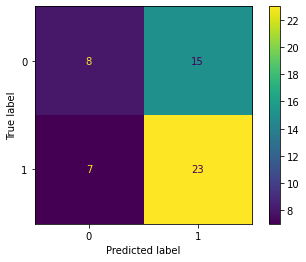

In [84]:
final_model_test(model=final_knn,final_x=scaled_final_X_test_data,final_y=final_y_test_data)

## training final model on all data

In [87]:
df

,prediction_date,open_price_1,open_price_2,open_price_3,open_price_4,open_price_5,open_price_6,high_1,high_2,high_3,...,close_price_4,close_price_5,close_price_6,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6,signal
0,2015-01-06,310.91,320.43,314.08,314.85,281.15,265.08,320.19,320.43,315.84,...,281.08,264.20,274.47,13942900,8036550,7860650,33054400,55629100,43962800,0
1,2015-01-07,320.43,314.08,314.85,281.15,265.08,274.61,320.43,315.84,315.15,...,264.20,274.47,286.19,8036550,7860650,33054400,55629100,43962800,23245700,0
2,2015-01-08,314.08,314.85,281.15,265.08,274.61,286.08,315.84,315.15,287.23,...,274.47,286.19,294.34,7860650,33054400,55629100,43962800,23245700,24866800,0
3,2015-01-09,314.85,281.15,265.08,274.61,286.08,294.14,315.15,287.23,278.34,...,286.19,294.34,283.35,33054400,55629100,43962800,23245700,24866800,19982500,0
4,2015-01-10,281.15,265.08,274.61,286.08,294.14,282.38,287.23,278.34,287.55,...,294.34,283.35,290.41,55629100,43962800,23245700,24866800,19982500,18718600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,2022-04-18,39533.71,40123.57,41160.22,39939.40,40552.32,40417.78,40617.59,41430.05,41451.48,...,40553.46,40424.48,39716.95,30991500854,27691105228,24342001973,21756855753,16833150693,19087633042,1
2656,2022-04-19,40123.57,41160.22,39939.40,40552.32,40417.78,39721.20,41430.05,41451.48,40617.72,...,40424.48,39716.95,40826.21,27691105228,24342001973,21756855753,16833150693,19087633042,33705182072,1
2657,2022-04-20,41160.22,39939.40,40552.32,40417.78,39721.20,40828.18,41451.48,40617.72,40633.68,...,39716.95,40826.21,41502.75,24342001973,21756855753,16833150693,19087633042,33705182072,25303206547,1
2658,2022-04-21,39939.40,40552.32,40417.78,39721.20,40828.18,41501.75,40617.72,40633.68,40570.73,...,40826.21,41502.75,41374.38,21756855753,16833150693,19087633042,33705182072,25303206547,27819532341,1


In [88]:
y_final = df["signal"]

In [89]:
y_final

0       0
1       0
2       0
3       0
4       0
       ..
2655    1
2656    1
2657    1
2658    1
2659    1
Name: signal, Length: 2660, dtype: int64

In [90]:
X_final_data = df.drop(["prediction_date","signal"],axis=1)

In [91]:
X_final_data

,open_price_1,open_price_2,open_price_3,open_price_4,open_price_5,open_price_6,high_1,high_2,high_3,high_4,...,close_price_3,close_price_4,close_price_5,close_price_6,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6
0,310.91,320.43,314.08,314.85,281.15,265.08,320.19,320.43,315.84,315.15,...,315.03,281.08,264.20,274.47,13942900,8036550,7860650,33054400,55629100,43962800
1,320.43,314.08,314.85,281.15,265.08,274.61,320.43,315.84,315.15,287.23,...,281.08,264.20,274.47,286.19,8036550,7860650,33054400,55629100,43962800,23245700
2,314.08,314.85,281.15,265.08,274.61,286.08,315.84,315.15,287.23,278.34,...,264.20,274.47,286.19,294.34,7860650,33054400,55629100,43962800,23245700,24866800
3,314.85,281.15,265.08,274.61,286.08,294.14,315.15,287.23,278.34,287.55,...,274.47,286.19,294.34,283.35,33054400,55629100,43962800,23245700,24866800,19982500
4,281.15,265.08,274.61,286.08,294.14,282.38,287.23,278.34,287.55,298.75,...,286.19,294.34,283.35,290.41,55629100,43962800,23245700,24866800,19982500,18718600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,39533.71,40123.57,41160.22,39939.40,40552.32,40417.78,40617.59,41430.05,41451.48,40617.72,...,39935.52,40553.46,40424.48,39716.95,30991500854,27691105228,24342001973,21756855753,16833150693,19087633042
2656,40123.57,41160.22,39939.40,40552.32,40417.78,39721.20,41430.05,41451.48,40617.72,40633.68,...,40553.46,40424.48,39716.95,40826.21,27691105228,24342001973,21756855753,16833150693,19087633042,33705182072
2657,41160.22,39939.40,40552.32,40417.78,39721.20,40828.18,41451.48,40617.72,40633.68,40570.73,...,40424.48,39716.95,40826.21,41502.75,24342001973,21756855753,16833150693,19087633042,33705182072,25303206547
2658,39939.40,40552.32,40417.78,39721.20,40828.18,41501.75,40617.72,40633.68,40570.73,40986.32,...,39716.95,40826.21,41502.75,41374.38,21756855753,16833150693,19087633042,33705182072,25303206547,27819532341


In [92]:
X_final_data_scaled = scaler.fit_transform(X_final_data)

In [94]:
final_knn.fit(X_final_data_scaled,y_final)

KNeighborsClassifier(n_neighbors=3)

In [95]:
pickle.dump(final_knn, open('final_model.pkl', 'wb'))

In [122]:
from pathlib import Path

In [127]:
Path('database.ini')

IndexError: 1

In [130]:
con =connect()

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 13.2 on x86_64-apple-darwin, compiled by Apple clang version 11.0.3 (clang-1103.0.32.59), 64-bit',)
Connection successful


In [133]:
datetime.today()

datetime.datetime(2022, 5, 11, 15, 46, 43, 74620)

In [134]:
datetime.strftime(datetime.today(), "%Y-%m-%d")

'2022-05-11'